In [1]:
from sklearn import datasets

In [3]:
dir(datasets);

# Machine Learning
## Modelling for Data Analytics

### Question 1: Regression
* Find the sklearn diabetes regression example using the sklearn documentation

* Create your own notebook of this example, partition each step into its own cell & inspect the relevant variables to understand the process

* When this is complete, investigate sklearn datasets

* Choose a different dataset (eg., breast cancer) and perform the same regression
    * you'll need to import it
    * choose some columns of the data set for your X
        * these will come from dataset.data
    * the target (y) is always dataset.target
        * this is an sklearn dataset convention

* EXTRA:
    * Choose more than one column from the features (dataset.data)
    * Investigate `train_test_split` and therefore use a better splitting strategy
    

### Question 2: Classification

* Simulate your own classification data set, ie., define an X and a y
* Train a KNeighborsClassifier and predict for unknown X

* NOTE:
    * X should be an array (/list) of multi-column arrays (/list)
    * y should be a single-column sequence
    * A single unknown X will therefore be a array of one array entry

In [14]:
X = [[18, 7], [30, 8], [40, 5], [50, 2]]
y = [1, 1, 0, 0] # classification <- groups

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

print(neigh.predict([[22, 8], [31, 5]]))
print(neigh.predict_proba([[22, 8], [32, 3]]))

[1 1]
[[0.33333333 0.66666667]
 [0.33333333 0.66666667]]


## Question 3: Tunining

* Try this approach with your own dataset

In [68]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

n = np.arange(1, 31) # n = n[n % 2 == 1]

hypers = { 'n_neighbors': n }
grid = GridSearchCV(KNeighborsClassifier(), hypers, cv = 5, scoring = 'accuracy')
grid.fit(X,y)

model = grid.best_estimator_
print(grid.best_score_, grid.best_params_)
print('x =', X[100], 'y_guess =', model.predict([ X[100] ]), 'answer =', y[100])

0.98 {'n_neighbors': 6}
x = [6.3 3.3 6.  2.5] y_guess = [2] answer = 2


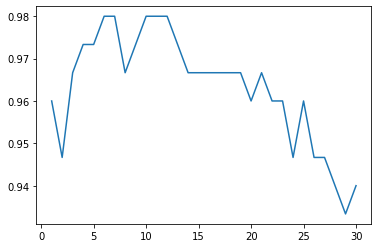

In [66]:
import seaborn as sns
sns.lineplot(n, grid.cv_results_['mean_test_score']);

## Question 4: Evaluation

In [94]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Data Prep
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

## Modelling
n = np.arange(1, 31) # n = n[n % 2 == 1]
hypers = { 'n_neighbors': n }
grid = GridSearchCV(KNeighborsClassifier(), hypers, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)


# ------------

## Evaluate
model = grid.best_estimator_
print('Eval Score: ', model.score(X_test, y_test)) 
#esp. using custom eval metric 

# -------------

## Deploy (retrain)
best = KNeighborsClassifier(**grid.best_params_)
best.fit(X, y)

print('Seen Score on Seen: ', best.score(X, y))

Eval Score:  0.9466666666666667
Seen Score on Seen:  0.98


## 'Real Evaluation'

In [90]:
def loss(y_pred, y_obsv): # 0 1
    scores = [ [0, 2],  [-2 * 100 , 0]]
    pass

In [86]:
def loss(y_pred, y_obsv):
    if (y_pred - y_obsv) < 0:
        return 1000 * (y_pred - y_obsv)**2
    else:
        return (y_pred - y_obsv)**2

In [87]:
loss(10, 8)

4

In [88]:
loss(8, 10)

4000